In [276]:
import numpy as np
import matplotlib.pyplot as plt
import pocomc as pc
from numpy.linalg import inv

LINEAR MODEL SIMULATION (formula: 2.5x+1, 10 data points)

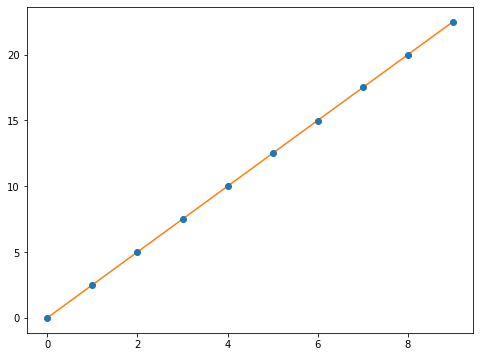

In [254]:
#Linear model simulations
#Creating Model
def lin_model(para, x):
    a, b = para
    return a*x+b
# Generating data
true_para = np.array([2.5,0])
x = np.array([0,1,2,3,4,5,6,7,8,9])
sigma = 0.005
data = np.random.normal(lin_model(true_para, x), sigma)
#Figure
plt.figure(figsize=(8,6))
plt.errorbar(x, data, yerr=sigma, fmt="o", label='data')
plt.plot(x, lin_model(true_para, x), label='model')
plt.show()

In [255]:
# Test
n_dim = 2
n_particles = 1000
# Log-prior probability density function
def log_prior(params, bounds):
    if np.any(params < bounds.T[0]) or np.any(params > bounds.T[1]):
        return -np.inf
    else:
        return 0.0
# Log-likelihood functions
def log_like(params, t, data, sigma):
    m = lin_model(params, t)
    diff = m - data
    return -0.5 * np.dot(diff, diff) / sigma**2.0
#Set Bounds
bounds = np.array([[-5, 5.0], # a
                   [-5, 5.0]]) # b 

In [256]:
prior_samples = np.random.uniform(low = bounds.T[0], high= bounds.T[1], size=(n_particles, n_dim))

In [257]:
# Sampler initialisation
sampler = pc.Sampler(n_particles,
                     n_dim,
                     log_likelihood=log_like,
                     log_prior=log_prior,
                     bounds=bounds,
                     log_likelihood_args=[x, data, sigma],
                     log_prior_args=[bounds]
                    )

In [258]:
# Run sampler
sampler.run(prior_samples)

Iter: 68it [03:15,  2.87s/it, beta=1, calls=131000, ESS=0.963, logZ=-23.1, accept=0.239, N=2, scale=1.26, corr=0.643]      


In [292]:
# Add extra samples
sampler.add_samples(1000)

Iter: 1it [00:00,  3.66it/s, beta=1, calls=tensor(133000), ESS=0.95, logZ=-23.1, accept=0.289, N=2, scale=1.28, corr=0.587]


In [259]:
results = sampler.results

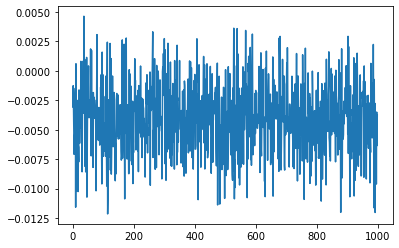

In [260]:
x=results["samples"]
plt.plot(x[:,1])

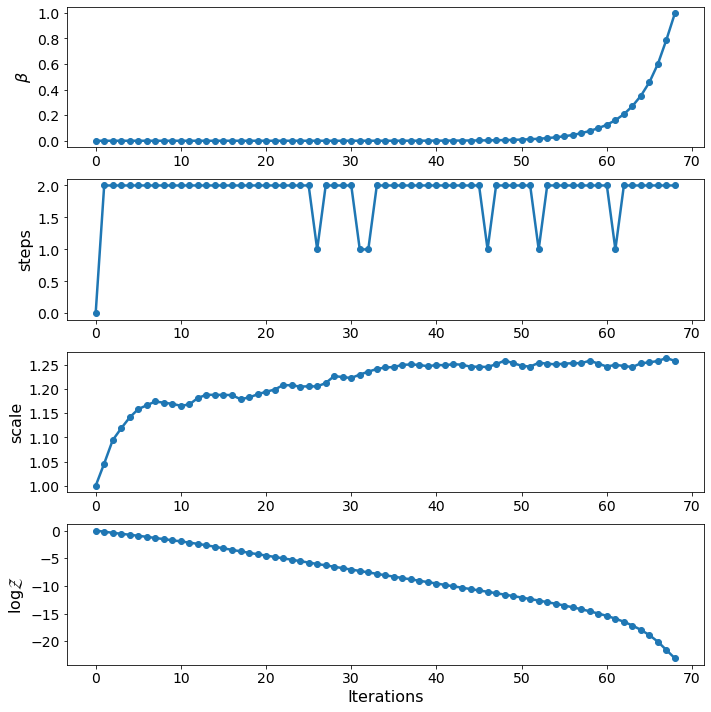

In [261]:
pc.plotting.run(results);

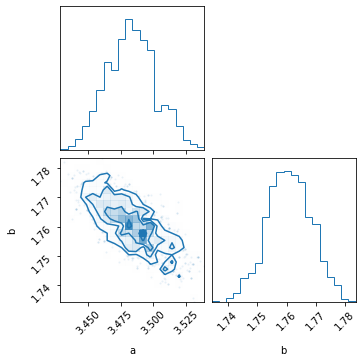

In [311]:
pc.plotting.corner(results, labels=['a', 'b']);

In [263]:
print('Mean values = ', np.mean(results['samples'], axis=0))
print('Standard deviation values = ', np.std(results['samples'], axis=0))

Mean values =  [ 2.5006864  -0.00403174]
Standard deviation values =  [0.00054481 0.00294356]


In [272]:
A = np.matrix('0 1; 1 1; 2 1; 3 1; 4 1; 5 1; 6 1; 7 1; 8 1; 9 1')
A_T = A.T

In [277]:
A_2 = A_T * A
A_inv = inv(A_2)

In [285]:
A_inv * 0.005**2

matrix([[ 3.03030303e-07, -1.36363636e-06],
        [-1.36363636e-06,  8.63636364e-06]])

In [290]:
#a_std^2
0.00054481**2

2.968179360999999e-07

In [291]:
#b_std^2
0.00294356**2

8.6645454736e-06

Log Model （3.5^x+1.75）

In [370]:
def model(params, t):
    A, B = params
    nA = np.array([A])
    print(np.array([A]))
    print(B)
    print(t)
    return np.power(A,t) + B
model([-1,1],t)


[-1]
1
[0.00389842 0.00545585 0.02135421 0.03915347 0.04375795 0.05299933
 0.05664085 0.0591899  0.06103837 0.06157505 0.06702192 0.0703803
 0.07424302 0.08039264 0.08417484 0.08767647 0.09464793 0.10314216
 0.10974644 0.11350325 0.13265886 0.13558659 0.17619438 0.18040743
 0.18360411 0.1939231  0.20159006 0.21043976 0.21275626 0.22147866
 0.23484408 0.23738252 0.23784308 0.24626089 0.26820958 0.27609996
 0.27784057 0.30519711 0.30932127 0.32067177 0.34278725 0.35647017
 0.3746703  0.37674705 0.44027987 0.47724223 0.48437437 0.51179702
 0.5143907  0.51514777 0.51896025 0.53036323 0.5311872  0.5364349
 0.53707699 0.54189546 0.54246345 0.54278235 0.57421623 0.58122116
 0.58975707 0.5968363  0.59890199 0.60582855 0.608899   0.61056216
 0.61562041 0.62223995 0.64556128 0.67861702 0.68375052 0.69168145
 0.69335018 0.73195886 0.74015785 0.74966321 0.76146583 0.76706236
 0.77109609 0.77164043 0.77668269 0.80131714 0.80250947 0.80319991
 0.8064244  0.83460637 0.84002769 0.86158448 0.87176257 0

<ipython-input-370-c93188a85e44>:7: RuntimeWarning: invalid value encountered in power
  return np.power(A,t) + B


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

-1.0
1.75
-1.0
1.75


<ipython-input-359-851db5bb1d95>:5: RuntimeWarning: invalid value encountered in power
  return A**t + B
/Users/sunnyguo/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


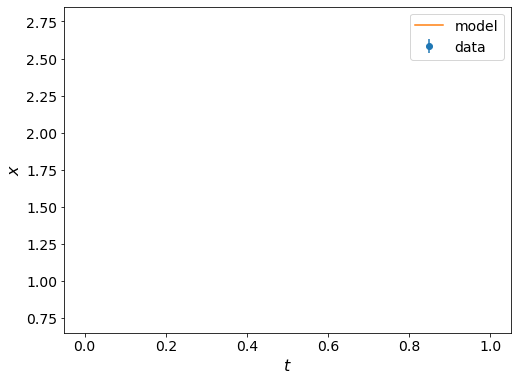

In [359]:
def model(params, t):
    A, B = params
    print(A)
    print(B)
    return A**t + B

# True parameters
params_true = np.array([-1, 1.75])

# Time instances corresponding to available data
t = np.random.uniform(0.0, 1.0, 100)
idx = np.argsort(t)
t = t[idx]

# Standard deviation of Gaussian noise of the data
sigma = 0.05

# Simulated data
data = np.random.normal(model(params_true, t), sigma) 

# Time range used for plotting only
t_range = np.linspace(0.0, 1.0, 300)

# Figure
plt.figure(figsize=(8,6))
plt.errorbar(t, data, yerr=sigma, fmt="o", label='data')
plt.plot(t_range, model(params_true, t_range), label='model')
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$x$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [344]:
# Log-likelihood functions
def log_like(params, t, data, sigma):
    m = model(params, t)
    diff = m - data
    return -0.5 * np.dot(diff, diff) / sigma**2.0

# Log-prior probability density function
def log_prior(params, bounds):
    if np.any(params < bounds.T[0]) or np.any(params > bounds.T[1]):
        return -np.inf
    else:
        return 0.0

# Parameter bounds
bounds = np.array([[-5.0, 5.0], # A
                   [-5.0, 5.0]]) # B

In [345]:
n_particles = 100
n_dim = 2

prior_samples = np.random.uniform(low = bounds.T[0], high= bounds.T[1], size=(n_particles, n_dim))

In [346]:
# Sampler initialisation
sampler = pc.Sampler(n_particles,
                     n_dim,
                     log_likelihood=log_like,
                     log_prior=log_prior,
                     bounds=bounds,
                     log_likelihood_args=[t, data, sigma],
                     log_prior_args=[bounds]
                    )

# Run sampler
sampler.run(prior_samples)

<ipython-input-343-9c93937557fe>:3: RuntimeWarning: invalid value encountered in power
  return A**t + B

Iter: 0it [00:00, ?it/s]
Iter: 0it [00:00, ?it/s, beta=0, calls=100, ESS=0.95, logZ=0, accept=0.234, N=0, scale=1]
Iter: 1it [00:00, 455.80it/s, beta=1, calls=100, ESS=nan, logZ=0, accept=0.234, N=0, scale=1]
Iter: 1it [00:00, 308.06it/s, beta=1, calls=100, ESS=nan, logZ=nan, accept=0.234, N=0, scale=1]

AssertionError: 

In [327]:
# Add extra samples
sampler.add_samples(2000)



Iter: 0it [00:00, ?it/s]

Iter: 0it [00:00, ?it/s, beta=1, calls=tensor(9200), ESS=0.95, logZ=-62.7, accept=0, N=0, scale=0]

Iter: 0it [00:00, ?it/s, beta=1, calls=tensor(9300), ESS=0.95, logZ=-62.7, accept=0.276, N=1, scale=1.27, corr=0.759]

Iter: 0it [00:00, ?it/s, beta=1, calls=tensor(9400), ESS=0.95, logZ=-62.7, accept=0.285, N=2, scale=1.28, corr=0.6]  

Iter: 1it [00:00, 16.49it/s, beta=1, calls=tensor(9500), ESS=0.95, logZ=-62.7, accept=0.245, N=1, scale=1.29, corr=0.759]

Iter: 1it [00:00, 13.90it/s, beta=1, calls=tensor(9600), ESS=0.95, logZ=-62.7, accept=0.291, N=2, scale=1.3, corr=0.604] 

Iter: 2it [00:00, 24.05it/s, beta=1, calls=tensor(9700), ESS=0.95, logZ=-62.7, accept=0.217, N=1, scale=1.29, corr=0.858]

Iter: 2it [00:00, 21.89it/s, beta=1, calls=tensor(9800), ESS=0.95, logZ=-62.7, accept=0.291, N=2, scale=1.3, corr=0.63]  

Iter: 3it [00:00, 30.04it/s, beta=1, calls=tensor(9900), ESS=0.95, logZ=-62.7, accept=0.276, N=1, scale=1.32, corr=0.719]

Iter: 4it [00:00, 3

In [329]:
results = sampler.results

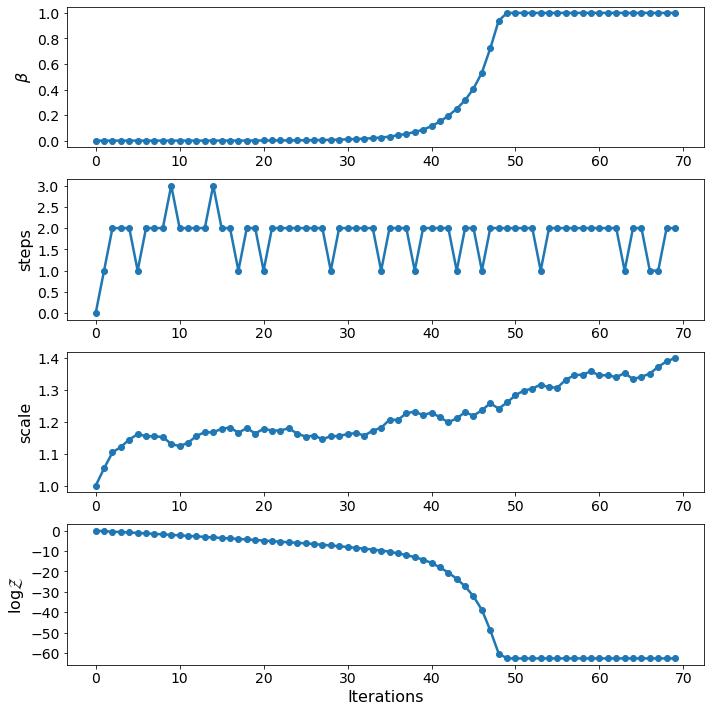

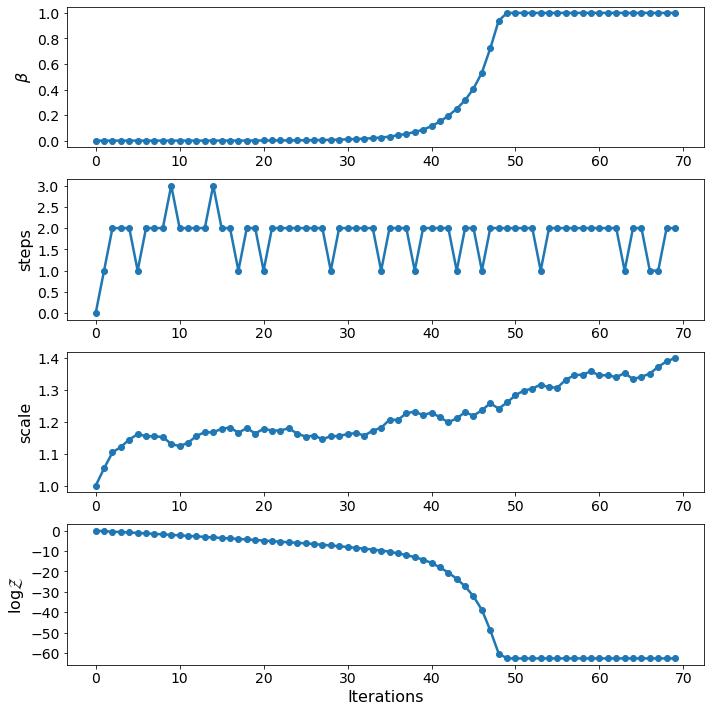

In [330]:
pc.plotting.run(results)

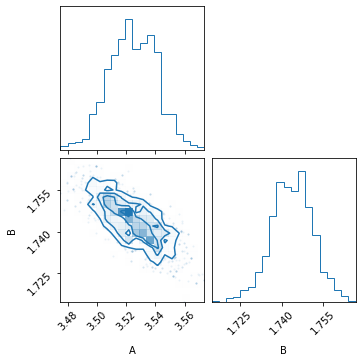

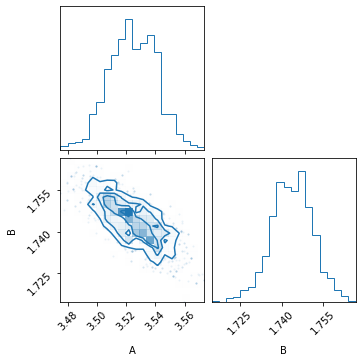

In [331]:
pc.plotting.corner(results, labels=['A', 'B'])

In [332]:
print('Mean values = ', np.mean(results['samples'], axis=0))
print('Standard deviation values = ', np.std(results['samples'], axis=0))

Mean values =  [3.5244746 1.7437047]
Standard deviation values =  [0.01629424 0.00737178]


Tutorial Model (0.5+1.75x)*cos(50t+0.8)

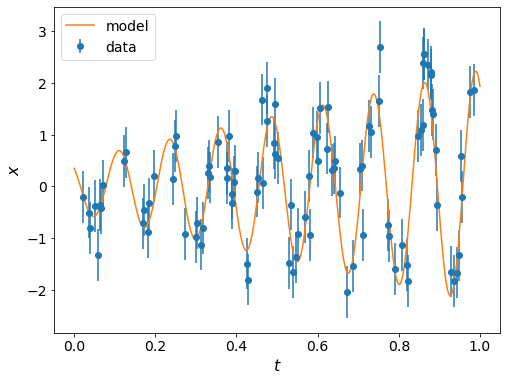

In [382]:
def model(params, t):
    A, B, omega, phi, = params
    return (A + B * t) * np.cos(omega * t + phi)

# True parameters
params_true = np.array([0.5, 1.75, 50.0, 0.8])

# Time instances corresponding to available data
t = np.random.uniform(0.0, 1.0, 100)
idx = np.argsort(t)
t = t[idx]

# Standard deviation of Gaussian noise of the data
sigma = 0.5

# Simulated data
data = np.random.normal(model(params_true, t), sigma) 

# Time range used for plotting only
t_range = np.linspace(0.0, 1.0, 300)

# Figure
plt.figure(figsize=(8,6))
plt.errorbar(t, data, yerr=sigma, fmt="o", label='data')
plt.plot(t_range, model(params_true, t_range), label='model')
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$x$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [383]:
# Log-likelihood functions
def log_like(params, t, data, sigma):
    m = model(params, t)
    diff = m - data
    return -0.5 * np.dot(diff, diff) / sigma**2.0

# Log-prior probability density function
def log_prior(params, bounds):
    if np.any(params < bounds.T[0]) or np.any(params > bounds.T[1]):
        return -np.inf
    else:
        return 0.0

# Parameter bounds
bounds = np.array([[-5.0, 5.0], # A
                   [-5.0, 5.0], # B
                   [10.0, 100.0], # omega
                   [0.0, np.pi]]) # phi

In [393]:
n_particles = 1000
n_dim = 4

prior_samples = np.random.uniform(low = bounds.T[0], high= bounds.T[1], size=(n_particles, n_dim))

In [394]:
# Sampler initialisation
sampler = pc.Sampler(n_particles,
                     n_dim,
                     log_likelihood=log_like,
                     log_prior=log_prior,
                     bounds=bounds,
                     log_likelihood_args=[t, data, sigma],
                     log_prior_args=[bounds]
                    )

# Run sampler
sampler.run(prior_samples)

Iter: 11it [28:02, 152.93s/it, beta=0.013, calls=35000, ESS=0.95, logZ=-5.53, accept=0.197, N=4, scale=0.944, corr=0.712]
Iter: 18it [01:12,  3.78s/it, beta=0.0294, calls=72000, ESS=0.95, logZ=-8.92, accept=0.34, N=1, scale=0.529, corr=0.951]   /Users/sunnyguo/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2098: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
Iter: 40it [02:43,  4.09s/it, beta=1, calls=139000, ESS=0.988, logZ=-62.3, accept=0.227, N=3, scale=1.08, corr=0.679]     


In [377]:
# Add extra samples
sampler.add_samples(200000)


Iter: 0it [00:00, ?it/s]
Iter: 0it [00:00, ?it/s, beta=1, calls=tensor(224965), ESS=0.95, logZ=-59.3, accept=0, N=0, scale=0]
Iter: 0it [00:00, ?it/s, beta=1, calls=tensor(225965), ESS=0.95, logZ=-59.3, accept=0.238, N=1, scale=1.15, corr=0.867]
Iter: 0it [00:00, ?it/s, beta=1, calls=tensor(226965), ESS=0.95, logZ=-59.3, accept=0.23, N=2, scale=1.15, corr=0.747] 
Iter: 1it [00:00,  7.57it/s, beta=1, calls=tensor(226965), ESS=0.95, logZ=-59.3, accept=0.23, N=2, scale=1.15, corr=0.747]
Iter: 1it [00:00,  7.57it/s, beta=1, calls=tensor(227965), ESS=0.95, logZ=-59.3, accept=0.238, N=1, scale=1.15, corr=0.882]
Iter: 1it [00:00,  7.57it/s, beta=1, calls=tensor(228965), ESS=0.95, logZ=-59.3, accept=0.243, N=2, scale=1.16, corr=0.756]
Iter: 1it [00:00,  7.57it/s, beta=1, calls=tensor(229965), ESS=0.95, logZ=-59.3, accept=0.226, N=3, scale=1.16, corr=0.658]
Iter: 2it [00:00,  7.44it/s, beta=1, calls=tensor(229965), ESS=0.95, logZ=-59.3, accept=0.226, N=3, scale=1.16, corr=0.658]
Iter: 2it [00:

Iter: 37it [00:04,  8.68it/s, beta=1, calls=tensor(323965), ESS=0.95, logZ=-59.3, accept=0.235, N=2, scale=1.15, corr=0.739]
Iter: 37it [00:04,  8.68it/s, beta=1, calls=tensor(324965), ESS=0.95, logZ=-59.3, accept=0.232, N=1, scale=1.15, corr=0.871]
Iter: 37it [00:04,  8.68it/s, beta=1, calls=tensor(325965), ESS=0.95, logZ=-59.3, accept=0.246, N=2, scale=1.16, corr=0.743]
Iter: 38it [00:04,  8.68it/s, beta=1, calls=tensor(326965), ESS=0.95, logZ=-59.3, accept=0.239, N=1, scale=1.16, corr=0.85] 
Iter: 38it [00:04,  8.68it/s, beta=1, calls=tensor(327965), ESS=0.95, logZ=-59.3, accept=0.242, N=2, scale=1.16, corr=0.723]
Iter: 39it [00:04,  9.48it/s, beta=1, calls=tensor(327965), ESS=0.95, logZ=-59.3, accept=0.242, N=2, scale=1.16, corr=0.723]
Iter: 39it [00:04,  9.48it/s, beta=1, calls=tensor(328965), ESS=0.95, logZ=-59.3, accept=0.217, N=1, scale=1.15, corr=0.893]
Iter: 39it [00:04,  9.48it/s, beta=1, calls=tensor(329965), ESS=0.95, logZ=-59.3, accept=0.211, N=2, scale=1.15, corr=0.784]


Iter: 75it [00:09,  7.49it/s, beta=1, calls=tensor(425965), ESS=0.95, logZ=-59.3, accept=0.243, N=1, scale=1.16, corr=0.856]
Iter: 75it [00:09,  7.49it/s, beta=1, calls=tensor(426965), ESS=0.95, logZ=-59.3, accept=0.239, N=2, scale=1.16, corr=0.752]
Iter: 75it [00:09,  7.49it/s, beta=1, calls=tensor(427965), ESS=0.95, logZ=-59.3, accept=0.231, N=3, scale=1.16, corr=0.656]
Iter: 76it [00:09,  7.99it/s, beta=1, calls=tensor(427965), ESS=0.95, logZ=-59.3, accept=0.231, N=3, scale=1.16, corr=0.656]
Iter: 76it [00:09,  7.99it/s, beta=1, calls=tensor(428965), ESS=0.95, logZ=-59.3, accept=0.228, N=1, scale=1.16, corr=0.865]
Iter: 76it [00:09,  7.99it/s, beta=1, calls=tensor(429965), ESS=0.95, logZ=-59.3, accept=0.223, N=2, scale=1.16, corr=0.759]
Iter: 76it [00:09,  7.99it/s, beta=1, calls=tensor(430965), ESS=0.95, logZ=-59.3, accept=0.23, N=3, scale=1.15, corr=0.65]  
Iter: 77it [00:09,  7.80it/s, beta=1, calls=tensor(430965), ESS=0.95, logZ=-59.3, accept=0.23, N=3, scale=1.15, corr=0.65]
It

Iter: 115it [00:13,  8.03it/s, beta=1, calls=tensor(526965), ESS=0.95, logZ=-59.3, accept=0.223, N=1, scale=1.16, corr=0.867]
Iter: 115it [00:14,  8.03it/s, beta=1, calls=tensor(527965), ESS=0.95, logZ=-59.3, accept=0.217, N=2, scale=1.15, corr=0.764]
Iter: 115it [00:14,  8.03it/s, beta=1, calls=tensor(528965), ESS=0.95, logZ=-59.3, accept=0.233, N=3, scale=1.15, corr=0.672]
Iter: 116it [00:14,  8.10it/s, beta=1, calls=tensor(528965), ESS=0.95, logZ=-59.3, accept=0.233, N=3, scale=1.15, corr=0.672]
Iter: 116it [00:14,  8.10it/s, beta=1, calls=tensor(529965), ESS=0.95, logZ=-59.3, accept=0.243, N=1, scale=1.16, corr=0.871]
Iter: 116it [00:14,  8.10it/s, beta=1, calls=tensor(530965), ESS=0.95, logZ=-59.3, accept=0.232, N=2, scale=1.16, corr=0.763]
Iter: 116it [00:14,  8.10it/s, beta=1, calls=tensor(531965), ESS=0.95, logZ=-59.3, accept=0.239, N=3, scale=1.16, corr=0.669]
Iter: 117it [00:14,  7.96it/s, beta=1, calls=tensor(531965), ESS=0.95, logZ=-59.3, accept=0.239, N=3, scale=1.16, corr

Iter: 153it [00:18,  8.38it/s, beta=1, calls=tensor(625965), ESS=0.95, logZ=-59.3, accept=0.252, N=2, scale=1.17, corr=0.736]
Iter: 154it [00:18,  8.38it/s, beta=1, calls=tensor(626965), ESS=0.95, logZ=-59.3, accept=0.229, N=1, scale=1.17, corr=0.874]
Iter: 154it [00:18,  8.38it/s, beta=1, calls=tensor(627965), ESS=0.95, logZ=-59.3, accept=0.238, N=2, scale=1.17, corr=0.752]
Iter: 154it [00:18,  8.38it/s, beta=1, calls=tensor(628965), ESS=0.95, logZ=-59.3, accept=0.223, N=3, scale=1.17, corr=0.66] 
Iter: 155it [00:18,  8.52it/s, beta=1, calls=tensor(628965), ESS=0.95, logZ=-59.3, accept=0.223, N=3, scale=1.17, corr=0.66]
Iter: 155it [00:18,  8.52it/s, beta=1, calls=tensor(629965), ESS=0.95, logZ=-59.3, accept=0.228, N=1, scale=1.16, corr=0.873]
Iter: 155it [00:18,  8.52it/s, beta=1, calls=tensor(630965), ESS=0.95, logZ=-59.3, accept=0.243, N=2, scale=1.17, corr=0.756]
Iter: 155it [00:18,  8.52it/s, beta=1, calls=tensor(631965), ESS=0.95, logZ=-59.3, accept=0.237, N=3, scale=1.17, corr=

Iter: 191it [00:22,  7.95it/s, beta=1, calls=tensor(723965), ESS=0.95, logZ=-59.3, accept=0.226, N=1, scale=1.15, corr=0.859]
Iter: 191it [00:23,  7.95it/s, beta=1, calls=tensor(724965), ESS=0.95, logZ=-59.3, accept=0.229, N=2, scale=1.14, corr=0.754]
Iter: 191it [00:23,  7.95it/s, beta=1, calls=tensor(725965), ESS=0.95, logZ=-59.3, accept=0.227, N=3, scale=1.14, corr=0.663]
Iter: 192it [00:23,  7.69it/s, beta=1, calls=tensor(725965), ESS=0.95, logZ=-59.3, accept=0.227, N=3, scale=1.14, corr=0.663]
Iter: 192it [00:23,  7.69it/s, beta=1, calls=tensor(726965), ESS=0.95, logZ=-59.3, accept=0.253, N=1, scale=1.15, corr=0.857]
Iter: 192it [00:23,  7.69it/s, beta=1, calls=tensor(727965), ESS=0.95, logZ=-59.3, accept=0.261, N=2, scale=1.16, corr=0.724]
Iter: 193it [00:23,  7.69it/s, beta=1, calls=tensor(728965), ESS=0.95, logZ=-59.3, accept=0.236, N=1, scale=1.16, corr=0.871]
Iter: 193it [00:23,  7.69it/s, beta=1, calls=tensor(729965), ESS=0.95, logZ=-59.3, accept=0.195, N=2, scale=1.15, corr

In [378]:
results = sampler.results

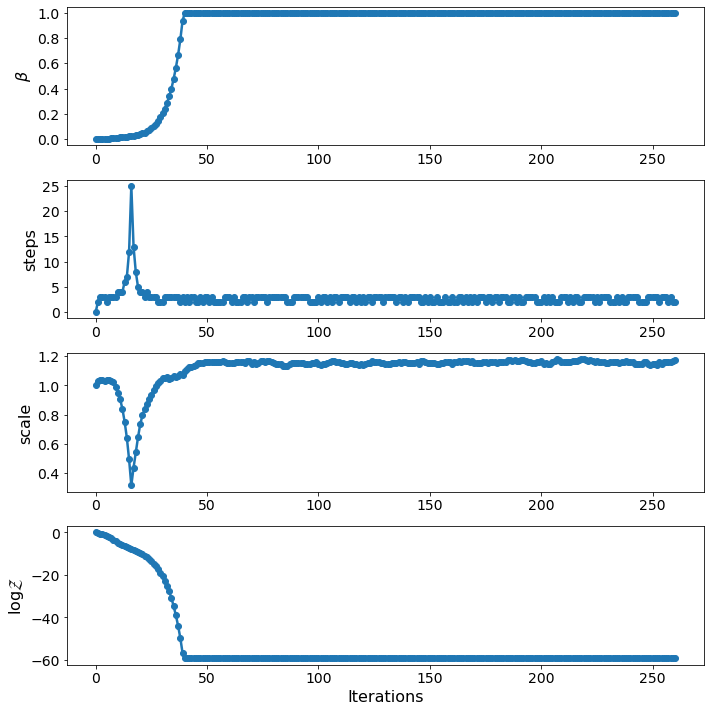

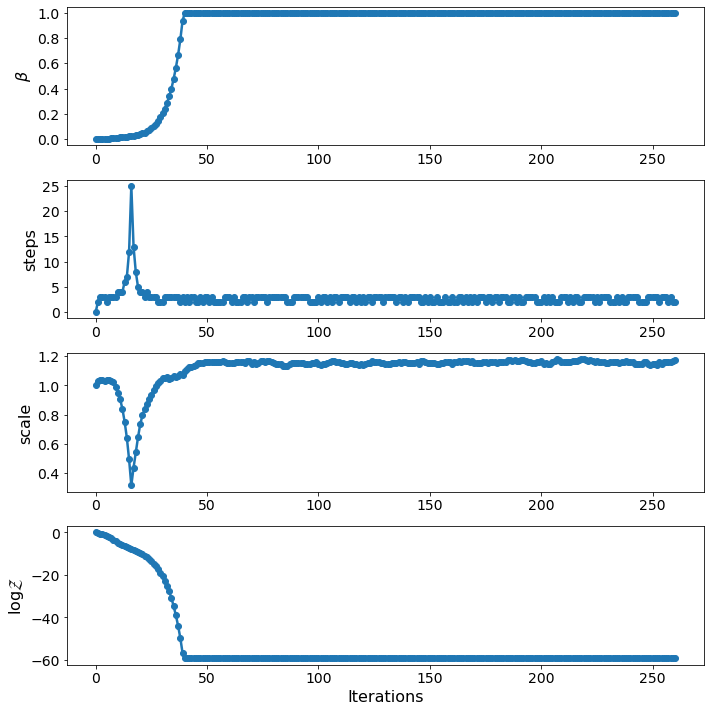

In [379]:
pc.plotting.run(results)

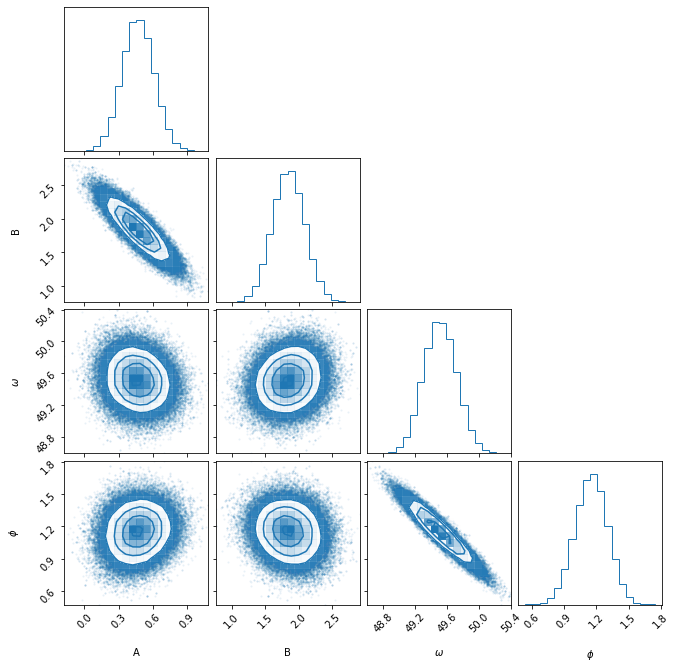

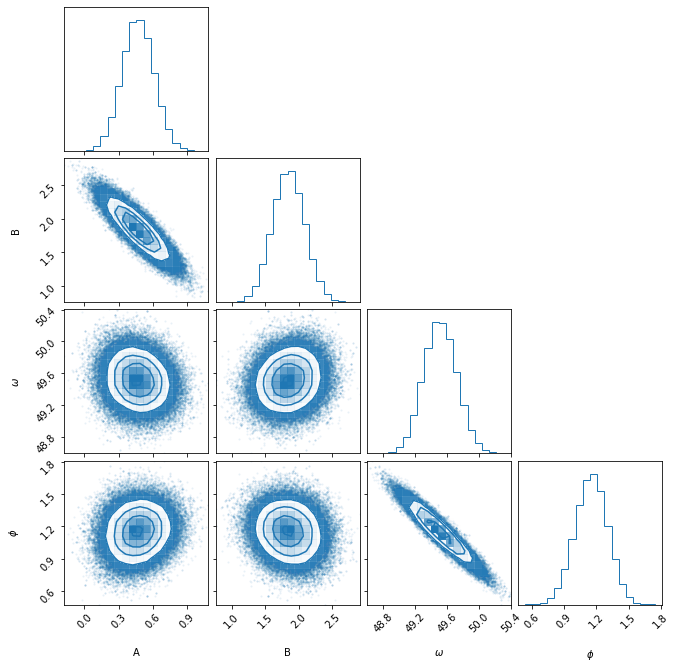

In [380]:
pc.plotting.corner(results, labels=['A', 'B', r'$\omega$', r'$\phi$'])

In [381]:
print('Mean values = ', np.mean(results['samples'], axis=0))
print('Standard deviation values = ', np.std(results['samples'], axis=0))

Mean values =  [ 0.4683456  1.8451915 49.514652   1.152557 ]
Standard deviation values =  [0.14081958 0.24218075 0.20846744 0.15017459]


In [358]:
model([-1,1],x)

<ipython-input-348-64a28476a0df>:3: RuntimeWarning: invalid value encountered in power
  return A**t + B


array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)